**Waste Management Optimization using ML**


*Objective*
* Develop a waste management optimization system using machine learning
techniques to address the challenges in waste collection and route planning.

* Improve the efficiency and effectiveness of waste management processes by utilizing predictive modeling and optimization algorithms. Minimize the amount of waste sent to landfills by optimizing waste collection routes and schedules.

* Enhance resource utilization and reduce operational costs through optimized waste management practices.

* Provide decision support tools for waste management authorities to make data-driven decisions and allocate resources efficiently.

* Contribute to environmental sustainability by promoting proper waste management practices and reducing the environmental impact of waste disposal.





In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Loading the dataset -(Dataset Availabe in Kaggle)

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving 2003_2017_waste.csv to 2003_2017_waste.csv


In [ ]:
import io
data= pd.read_csv(io.BytesIO(data_to_load['2003_2017_waste.csv']))

In [ ]:
data.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016
3,C&D,9700,1585700.0,1595400,0.99,2016
4,Horticultural waste,111500,209000.0,320500,0.65,2016


**Performing linear regression for waste generation prediction**

Mean Squared Error (Linear Regression): 33.950857554266435


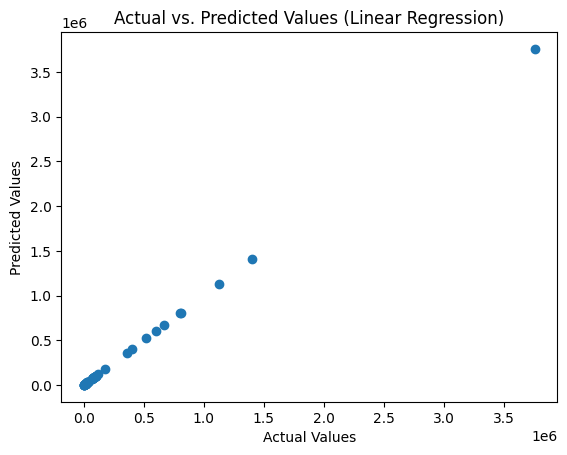

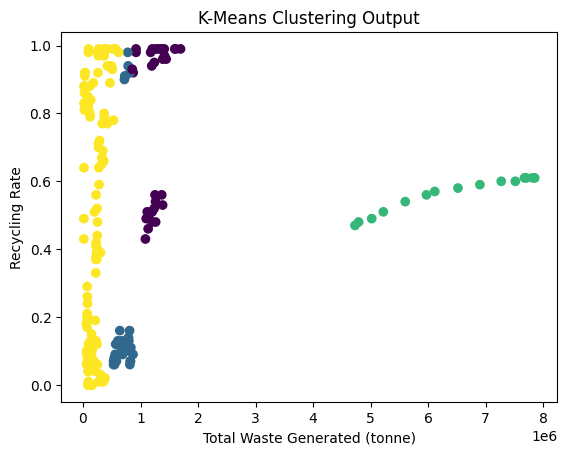

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split





data_encoded = pd.get_dummies(data, columns=["waste_type"])

# Split the dataset into features (X) and target variable (y)
X = data_encoded.drop(columns=["total_waste_recycled_tonne"])
y = data_encoded["total_waste_recycled_tonne"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform linear regression for waste generation prediction
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
waste_predictions_lr = lr_model.predict(X_test)

# Perform k-means clustering for waste collection route optimization
kmeans = KMeans(n_clusters=4,n_init=3, init='random', random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

# Evaluate the model
mse_lr = mean_squared_error(y_test, waste_predictions_lr)

# Print the mean squared error
print("Mean Squared Error (Linear Regression):", mse_lr)

# Scatter plot of actual vs. predicted values from linear regression
plt.scatter(y_test, waste_predictions_lr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.show()

# Scatter plot of k-means clustering output
plt.scatter(X["total_waste_generated_tonne"], X["recycling_rate"], c=cluster_labels)
plt.xlabel("Total Waste Generated (tonne)")
plt.ylabel("Recycling Rate")
plt.title("K-Means Clustering Output")
plt.show()





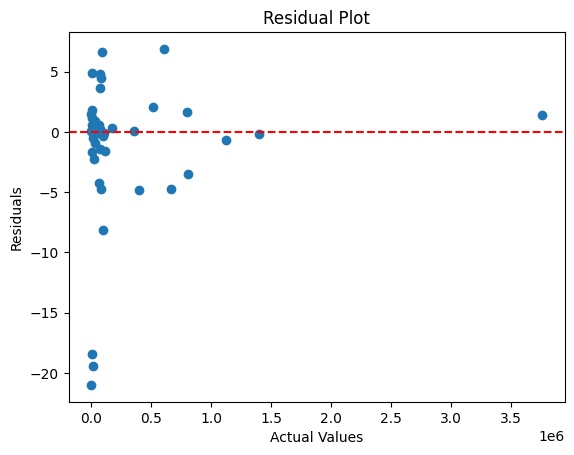

Coefficient of Determination (R-squared): 0.9999999999093712
Inertia: 29845258627292.83


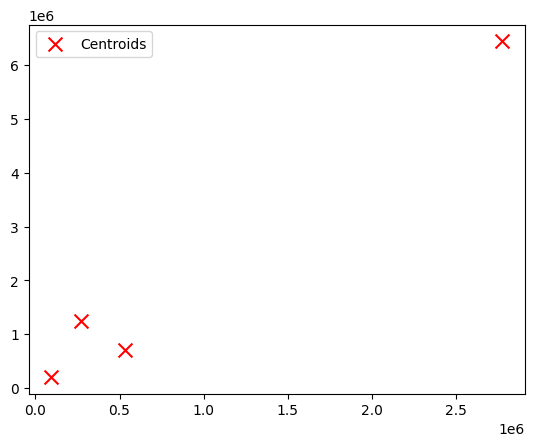

In [ ]:
# Calculate and plot the residuals of the linear regression model
residuals = y_test - waste_predictions_lr
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Calculate and print the coefficient of determination (R-squared) of the linear regression model
r_squared = lr_model.score(X_test, y_test)
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate and print the inertia of the K-means clustering model
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Visualize the centroids of the K-means clustering model
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r', s=100, label='Centroids')
plt.legend()
plt.show()

Residual Plot: It calculates the residuals (the difference between the actual values and predicted values) of the linear regression model and plots them against the actual values. This helps to analyze the distribution of errors and check for any patterns.

Coefficient of Determination (R-squared): It calculates and prints the coefficient of determination (R-squared) of the linear regression model. R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

Inertia: It calculates and prints the inertia of the K-means clustering model. Inertia is a measure of how internally coherent the clusters are. Lower inertia values indicate better clustering results.

Centroids Visualization: It visualizes the centroids of the K-means clustering model by plotting them on the scatter plot. The centroids represent the mean values of each cluster and provide insights into the cluster characteristics


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate and print the Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, waste_predictions_lr)
print("Mean Absolute Error (Linear Regression):", mae_lr)

# Calculate and print the R-squared (coefficient of determination)
r_squared = lr_model.score(X_test, y_test)
print("R-squared (Linear Regression):", r_squared)


Mean Absolute Error (Linear Regression): 3.1903793085319685
R-squared (Linear Regression): 0.9999999999093712
